# A dictionary is a mapping

A dictionary is like an array, but more general. In an array, the indices have to be integers; in a dictionary they can be (almost) any type.
A dictionary contains a collection of indices, which are called *keys*, and a collection of *values*. Each key is associated with a single value. The association of a key and a value is called a *key-value pair* or sometimes an item.

In mathematical language, a dictionary represents a mapping from keys to values, so you can also say that each key “maps to” a value. As an example, we’ll build a dictionary that maps from English to Spanish words, so the keys and the values are all strings.

The function `Dict` creates a new dictionary with no items. Because `Dict` is the name of a built-in function, you should avoid using it as a variable name.

In [9]:
eng2sp = Dict()

Dict{Any,Any} with 0 entries

To add items to the dictionary, you can use square brackets:

In [10]:
eng2sp["one"] = "uno"

"uno"

This line creates an item that maps from the key `"one"` to the value `"uno"`. If we print the dictionary again, we see a key-value pair:

In [11]:
eng2sp

Dict{Any,Any} with 1 entry:
  "one" => "uno"

This output format is also an input format. For example, you can create a new dictionary with three items:

In [12]:
eng2sp = Dict("one" => "uno", "two" => "dos", "three" => "tres")

Dict{String,String} with 3 entries:
  "two"   => "dos"
  "one"   => "uno"
  "three" => "tres"

You might be surprised by the output. The order of the key-value pairs might not be the same. If you type the same example on your computer, you might get a different result. In general, the order of items in a dictionary is unpredictable.

But that’s not a problem because the elements of a dictionary are never indexed with integer indices. Instead, you use the keys to look up the corresponding values:

In [13]:
eng2sp["two"]

"dos"

The key `"two"` always maps to the value `"dos"` so the order of the items doesn’t matter.
If the key isn’t in the dictionary, you get a `KeyError`:

In [14]:
eng2sp["four"]

LoadError: [91mKeyError: key "four" not found[39m

The `length` function works on dictionaries; it returns the number of key-value pairs:

In [15]:
length(eng2sp)

3

To see whether something appears as a key in a dictionary, you can use the function `keys`, which returns a collection of keys, and then use the `in` operator:

In [18]:
"one" in keys(eng2sp)

true

To see whether something appears as a value in a dictionary, you can use the method `values`, which returns a collection of values, and then use the `in` operator:

In [19]:
"uno" in values(eng2sp)

true

The `in` operator uses different algorithms for arrays and dictionaries. For arrays, it searches the elements of the list in order. As the array gets longer, the search time gets longer in direct proportion.

For dictionaries, Julia uses an algorithm called a *hashtable* that has a remarkable property: the `in` operator takes about the same amount of time no matter how many items are in the dictionary. 

# Dictionary as a collection of counters

Suppose you are given a string and you want to count how many times each letter appears. There are several ways you could do it:

- You could create 26 variables, one for each letter of the alphabet. Then you could traverse the string and, for each character, increment the corresponding counter, probably using a chained conditional.

- You could create a list with 26 elements. Then you could convert each character to a number, use the number as an index into the list, and increment the appropriate counter.

- You could create a dictionary with characters as keys and counters as the corresponding values. The first time you see a character, you would add an item to the dictionary. After that you would increment the value of an existing item.

Each of these options performs the same computation, but each of them implements that computation in a different way.

An *implementation* is a way of performing a computation; some implementations are better than others. For example, an advantage of the dictionary implementation is that we don’t have to know ahead of time which letters appear in the string and we only have to make room for the letters that do appear.

Here is what the code might look like:

In [1]:
function histogram(s)
    d = Dict()
    for c in s
        if c ∉ keys(d)
            d[c] = 1
        else
            d[c] += 1
        end
    end
    d
end

histogram (generic function with 1 method)

The name of the function is `histogram`, which is a statistical term for a collection of counters (or frequencies).
The first line of the function creates an empty dictionary. The `for` loop traverses the string. Each time through the loop, if the character `c` is not in the dictionary, we create a new item with key `c` and the initial value `1` (since we have seen this letter once). If `c` is already in the dictionary we increment `d[c]`.

Here’s how it works:

In [2]:
histogram("brontosaurus")

Dict{Any,Any} with 8 entries:
  'n' => 1
  'b' => 1
  'o' => 2
  't' => 1
  'a' => 1
  'u' => 2
  's' => 2
  'r' => 2

The histogram indicates that the letters `'a'` and `'b'` appear once; `'o'` appears twice, and so on.

Dictionaries have a function called `get` that takes a key and a default value. If the key appears in the dictionary, get returns the corresponding value; otherwise it returns the default value. For example:

In [34]:
h = histogram("a")
println(get(h, 'a', 0))
println(get(h, 'b', 0))

1
0


# Looping and dictionaries

You can traverse the keys of the dictionary in a `for` statement. For example, `print_hist` prints each key and the corresponding value:

In [4]:
function print_hist(h)
    for k in keys(h)
        println(k, " ", h[k])
    end
end

print_hist (generic function with 1 method)

Here’s what the output looks like:

In [5]:
h = histogram("parrot")
print_hist(h)

o 1
a 1
p 1
t 1
r 2


# Reverse lookup

Given a dictionary `d` and a key `k`, it is easy to find the corresponding value `v = d[k]`. This operation is called a *lookup*.

But what if you have `v` and you want to find `k`? You have two problems: first, there might be more than one key that maps to the value `v`. Depending on the application, you might be able to pick one, or you might have to make an array that contains all of them. Second, there is no simple syntax to do a *reverse lookup*; you have to search.

Here is a function that takes a value and returns the first key that maps to that value:

In [8]:
struct LookupError <: Exception end

function reverse_lookup(d, v)
    for key in keys(d)
        value = d[key]
        if value == v
            return key
        end
    end
    throw(LookupError())
end

reverse_lookup (generic function with 1 method)

This function is yet another example of the search pattern, but it uses a feature we haven’t seen before, raise. The raise statement causes an exception; in this case it causes a `LookupError`, which is an `Exception` used to indicate that a key does not exist.

If we get to the end of the loop, that means `v` doesn’t appear in the dictionary as a value, so we throw an exception.

Here is an example of a successful reverse lookup:

In [9]:
h = histogram("parrot")
k = reverse_lookup(h, 2)

'r': ASCII/Unicode U+0072 (category Ll: Letter, lowercase)

And an unsuccessful one:

In [10]:
k = reverse_lookup(h, 3)

LoadError: [91mLookupError()[39m

A reverse lookup is much slower than a forward lookup; if you have to do it often, or if the dictionary gets big, the performance of your program will suffer.

# Dictionaries and arrays

Arrays can appear as values in a dictionary. For example, if you are given a dictionary that maps from letters to frequencies, you might want to invert it; that is, create a dictionary that maps from frequencies to letters. Since there might be several letters with the same frequency, each value in the inverted dictionary should be an array of letters.

Here is a function that inverts a dictionary:

In [13]:
function invert_dict(d)
    inverse = Dict()
    for key in keys(d)
        val = d[key]
        if val ∉ keys(inverse)
            inverse[val] = [key]
        else
            push!(inverse[val], key)
        end
    end
    inverse
end

invert_dict (generic function with 1 method)

Each time through the loop, `key` gets a key from `d` and `val` gets the corresponding value. If `val` is not in `inverse`, that means we haven’t seen it before, so we create a new item and initialize it with a *singleton* (an array that contains a single element). Otherwise we have seen this value before, so we append the corresponding key to the array.

Here is an example:

In [14]:
hist = histogram("parrot")
println(hist)
inverse = invert_dict(hist)

Dict{Any,Any}(Pair{Any,Any}('o', 1),Pair{Any,Any}('a', 1),Pair{Any,Any}('p', 1),Pair{Any,Any}('t', 1),Pair{Any,Any}('r', 2))


Dict{Any,Any} with 2 entries:
  2 => ['r']
  1 => ['o', 'a', 'p', 't']

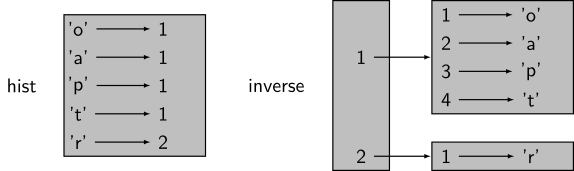

In [113]:
using TikzPictures
TikzPicture(L"""
    \node(hist) [draw, fill=lightgray, minimum width=2.5cm, minimum height=2.5cm]{};
    \node(nhist)[left of = hist, xshift=-1cm]{hist};
    \node(no) at(-1,1) {'o'};
    \node(o) at(0.5,1) {1};
    \draw[-latex](no)--(o);
    \node(na) at(-1,0.5) {'a'};
    \node(a) at(0.5,0.5) {1};
    \draw[-latex](na)--(a);
    \node(np) at(-1,0) {'p'};
    \node(p) at(0.5,0) {1};
    \draw[-latex](np)--(p);
    \node(nt) at(-1,-0.5) {'t'};
    \node(t) at(0.5,-0.5) {1};
    \draw[-latex](nt)--(t);
    \node(nr) at(-1,-1) {'r'};
    \node(r) at(0.5,-1) {2};
    \draw[-latex](nr)--(r);
    \node(inverse) [draw, right of = hist, xshift=3cm, fill=lightgray, minimum width=1cm, minimum height=3cm]{};
    \node(ninverse)[left of = inverse, xshift=-0.5cm]{inverse};
    \node(n1) at(4,0.5){1};
    \node(n2) at(4,-1.25){2};
    \node(a1) [draw, fill=lightgray, minimum width=2.5cm, minimum height=2cm] at(6.5,0.5){};
    \node(a2) [draw, fill=lightgray, minimum width=2.5cm, minimum height=0.5cm] at(6.5,-1.25){};
    \draw[-latex](n1)--(a1);
    \draw[-latex](n2)--(a2);
    \node(t1) at(5.5, 1.25){1};
    \node(t2) at(5.5, 0.75){2};
    \node(t3) at(5.5, 0.25){3};
    \node(t4) at(5.5, -0.25){4};
    \node(tt1) at(5.5, -1.25){1};
    \node(v1) at(7, 1.25){'o'};
    \node(v2) at(7, 0.75){'a'};
    \node(v3) at(7, 0.25){'p'};
    \node(v4) at(7, -0.25){'t'};
    \node(vv1) at(7, -1.25){'r'};
    \draw[-latex](t1)--(v1);
    \draw[-latex](t2)--(v2);
    \draw[-latex](t3)--(v3);
    \draw[-latex](t4)--(v4);
    \draw[-latex](tt1)--(vv1);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

I mentioned earlier that a dictionary is implemented using a hashtable and that means that the keys have to be hashable.

A hash is a function that takes a value (of any kind) and returns an integer. Dictionaries use these integers, called hash values, to store and look up key-value pairs.

# Memos

If you played with the `fibonacci` function, you might have noticed that the bigger the argument you provide, the longer the function takes to run. Furthermore, the run time increases quickly.

To understand why we can look at the *call graph* for fibonacci with `n=4`:

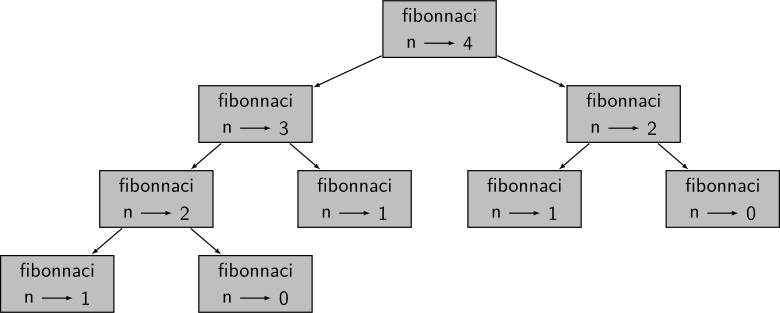

In [155]:
using TikzPictures
TikzPicture(L"""
    \node(fib4) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm]{};
    \node at (0,0.25){fibonnaci};
    \node(f4n) at (-0.5, -0.25){n};
    \node(f4) at (0.5, -0.25){4};
    \draw[-latex] (f4n)--(f4);
    \node(fib3) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(-3.25,-1.5){};
    \node at (-3.25,-1.25){fibonnaci};
    \node(f3n) at (-3.75, -1.75){n};
    \node(f3) at (-2.75, -1.75){3};
    \draw[-latex] (f3n)--(f3);
    \node(fib2) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(3.25,-1.5){};
    \node at (3.25,-1.25){fibonnaci};
    \node(f2n) at (2.75, -1.75){n};
    \node(f2) at (3.75, -1.75){2};
    \draw[-latex] (f2n)--(f2);
    \node(fib22) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(-5,-3){};
    \node at (-5,-2.75){fibonnaci};
    \node(f22n) at (-5.5, -3.25){n};
    \node(f22) at (-4.5, -3.25){2};
    \draw[-latex] (f22n)--(f22);
    \node(fib1) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(-1.5,-3){};
    \node at (-1.5,-2.75){fibonnaci};
    \node(f1n) at (-2, -3.25){n};
    \node(f1) at (-1, -3.25){1};
    \draw[-latex] (f1n)--(f1);
    \node(fib11) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(1.5,-3){};
    \node at (1.5,-2.75){fibonnaci};
    \node(f11n) at (1, -3.25){n};
    \node(f11) at (2, -3.25){1};
    \draw[-latex] (f11n)--(f11);
    \node(fib0) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(5,-3){};
    \node at (5,-2.75){fibonnaci};
    \node(f0n) at (4.5, -3.25){n};
    \node(f0) at (5.5, -3.25){0};
    \draw[-latex] (f0n)--(f0);
    \node(fib111) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(-6.75,-4.5){};
    \node at (-6.75,-4.25){fibonnaci};
    \node(f111n) at (-7.25, -4.75){n};
    \node(f111) at (-6.25, -4.75){1};
    \draw[-latex] (f111n)--(f111);
    \node(fib00) [draw, fill=lightgray, minimum width=2cm, minimum height=1cm] at(-3.25,-4.5){};
    \node at (-3.25,-4.25){fibonnaci};
    \node(f00n) at (-3.75, -4.75){n};
    \node(f00) at (-2.75, -4.75){0};
    \draw[-latex] (f00n)--(f00);
    \draw[-latex] (fib4)--(fib3);
    \draw[-latex] (fib4)--(fib2);
    \draw[-latex] (fib3)--(fib22);
    \draw[-latex] (fib3)--(fib1);
    \draw[-latex] (fib2)--(fib11);
    \draw[-latex] (fib2)--(fib0);
    \draw[-latex] (fib22)--(fib111);
    \draw[-latex] (fib22)--(fib00);
"""; options="very thick, scale=2, transform shape", preamble="""
    \\usepackage{newtxmath}
    \\renewcommand{\\familydefault}{\\sfdefault}
    \\usepackage{cancel}
""")

A call graph shows a set of function frames, with lines connecting each frame to the frames of the functions it calls. At the top of the graph, `fibonacci` with `n=4` calls `fibonacci` with `n=3` and `n=2`. In turn, `fibonacci` with `n=3` calls `fibonacci` with `n=2` and `n=1`. And so on.

Count how many times `fibonacci(0)` and `fibonacci(1)` are called. This is an inefficient solution to the problem, and it gets worse as the argument gets bigger.

One solution is to keep track of values that have already been computed by storing them in a dictionary. A previously computed value that is stored for later use is called a *memo*. 

Here is a “memoized” version of fibonacci:

In [160]:
known = Dict(0=>0, 1=>1)

function fibonacci(n)
    if n ∈ keys(known)
        return known[n]
    end
    res = fibonacci(n-1) + fibonacci(n-2)
    known[n] = res
    res
end

fibonacci(10)

55

`known` is a dictionary that keeps track of the Fibonacci numbers we already know. It starts with two items: `0` maps to `0` and `1` maps to `1`.

Whenever `fibonacci` is called, it checks `known`. If the result is already there, it can return immediately. Otherwise it has to compute the new value, add it to the dictionary, and return it.

If you run this version of fibonacci and compare it with the original, you will find that it is much faster.

# Debugging

As you work with bigger datasets it can become unwieldy to debug by printing and checking the output by hand. Here are some suggestions for debugging large datasets:

- Scale down the input:

    If possible, reduce the size of the dataset. For example if the program reads a text file, start with just the first 10 lines, or with the smallest example you can find. You can either edit the files themselves, or (better) modify the program so it reads only the first n lines.
    
    If there is an error, you can reduce n to the smallest value that manifests the error, and then increase it gradually as you find and correct errors.

- Check summaries and types:

    Instead of printing and checking the entire dataset, consider printing summaries of the data: for example, the number of items in a dictionary or the total of a list of numbers.
    
    A common cause of runtime errors is a value that is not the right type. For debugging this kind of error, it is often enough to print the type of a value.

- Write self-checks:

    Sometimes you can write code to check for errors automatically. For example, if you are computing the average of a list of numbers, you could check that the result is not greater than the largest element in the list or less than the smallest. This is called a “sanity check” because it detects results that are “insane”.
    
    Another kind of check compares the results of two different computations to see if they are consistent. This is called a “consistency check”.

- Format the output:

    Formatting debugging output can make it easier to spot an error.
    
Again, time you spend building scaffolding can reduce the time you spend debugging.